In [15]:
# Load the dataset
diabetes_data = pd.read_csv("diabetes.csv")

In [16]:
# Separate features and target
X = diabetes_data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target column
y = diabetes_data['Outcome']

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [19]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [21]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred = model.predict(X_test_selected)

In [23]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [24]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [25]:
# Print specific diabetes prediction message
if y_pred[0] == 1:
    print("\nThe persondoes not diabetes.")
else:
    print("\nThe person has diabetes.")


The person has diabetes.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)



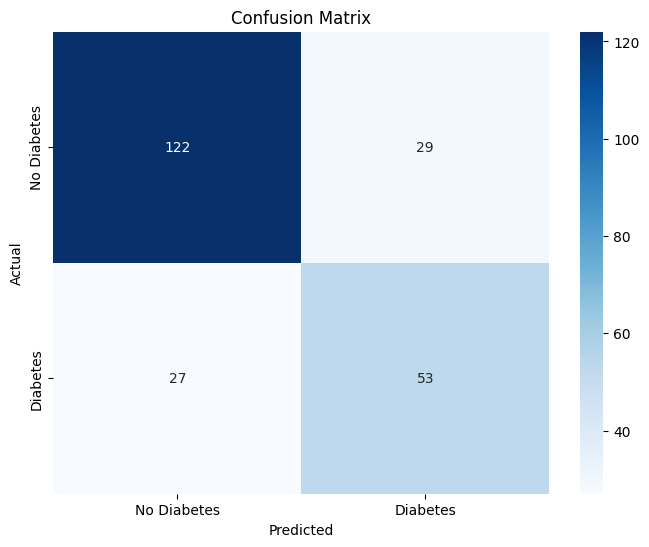

In [28]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()